# Exercicio 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn as sns


# 2. Carregamento e análise inicial dos dados

In [ ]:
colunas = [
    'Class',
    'Alcohol', 'Malic_Acid', 'Ash', 'Alcalinity_of_Ash', 'Magnesium',
    'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
    'Proanthocyanins', 'Color_Intensity', 'Hue',
    'OD280/OD315_of_Diluted_Wines', 'Proline'
]

In [ ]:

df = pd.read_csv('/content/wine.data', names=colunas)

In [ ]:
print("Visualização das 5 primeiras linhas:")
display(df.head())

print("\nInformações do dataset:")
print(df.info())

print("\nDistribuição das classes:")
print(df['Class'].value_counts())

Visualização das 5 primeiras linhas:


,Class,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315_of_Diluted_Wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735



Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_Ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_Phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315_of_Diluted_Wines  178 non-n

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class'] - 1  # Ajustando para classes 0, 1, 2

# 3. Preparação dos dados

In [ ]:
# 4. Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Normalização das features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Tamanho do treino: {X_train.shape[0]}")
print(f"Tamanho do teste:  {X_test.shape[0]}")

Tamanho do treino: 142
Tamanho do teste:  36


In [ ]:
# One-hot encoding das classes
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# 4. Criação e treinamento da Rede Neural (Keras)

In [ ]:
# Modelo sequencial com duas camadas ocultas de 32 neurônios
model = Sequential([
    Dense(32, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')  # 3 classes
])

In [ ]:
# Compilação
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
# Treinamento
history = model.fit(
    X_train_scaled, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=8,
    verbose=1
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5045 - loss: 0.9818 - val_accuracy: 0.6207 - val_loss: 0.9027
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8299 - loss: 0.7101 - val_accuracy: 0.8276 - val_loss: 0.7400
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8767 - loss: 0.5852 - val_accuracy: 0.8621 - val_loss: 0.6147
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9460 - loss: 0.4094 - val_accuracy: 0.8621 - val_loss: 0.4971
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9153 - loss: 0.3660 - val_accuracy: 0.8966 - val_loss: 0.3924
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9526 - loss: 0.2829 - val_accuracy: 0.9310 - val_loss: 0.2973
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9327 - loss: 0.2704 - val_accuracy: 0.9310 - val_loss: 0.2341
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9466 - loss: 0.1826 - val_accuracy: 0.9655 - 

# 5. Avaliação da Rede Neural

In [ ]:
loss, acc = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"Acurácia da Rede Neural (Keras) no teste: {acc:.4f}")


Acurácia da Rede Neural (Keras) no teste: 0.9444


In [ ]:
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

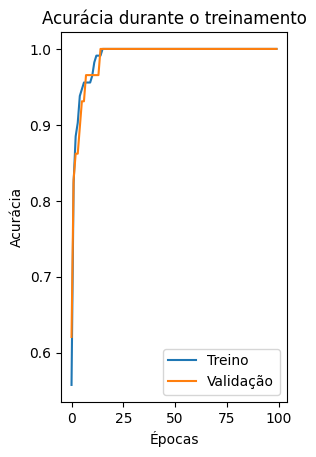

In [ ]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()


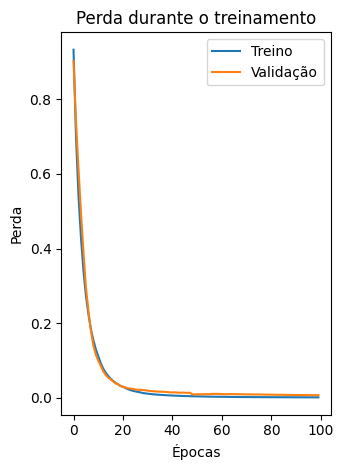

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()

plt.tight_layout()
plt.show()

# 6. Comparação com modelo clássico (RandomForest)

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100, random_state=42
)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predições
y_pred_rf = rf_model.predict(X_test_scaled)

# Acurácia
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do Random Forest no teste: {acc_rf:.4f}")

Acurácia do Random Forest no teste: 1.0000


# 7. Comparação das métricas

In [ ]:
print("\nRelatório da Rede Neural:")
y_pred_nn = np.argmax(model.predict(X_test_scaled), axis=1)
print(classification_report(y_test, y_pred_nn))

print("\nRelatório do Random Forest:")
print(classification_report(y_test, y_pred_rf))



Relatório da Rede Neural:
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.93      0.93      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.95      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36


Relatório do Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [ ]:
# Comparando graficamente
labels = ['Rede Neural (Keras)', 'Random Forest']
scores = [acc, acc_rf]

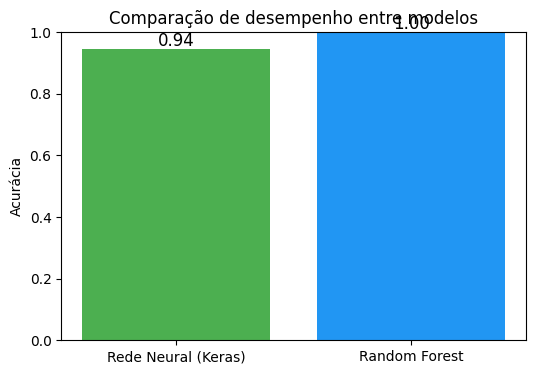

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(labels, scores, color=['#4caf50', '#2196f3'])
plt.ylabel('Acurácia')
plt.title('Comparação de desempenho entre modelos')
plt.ylim(0,1)
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', fontsize=12)
plt.show()

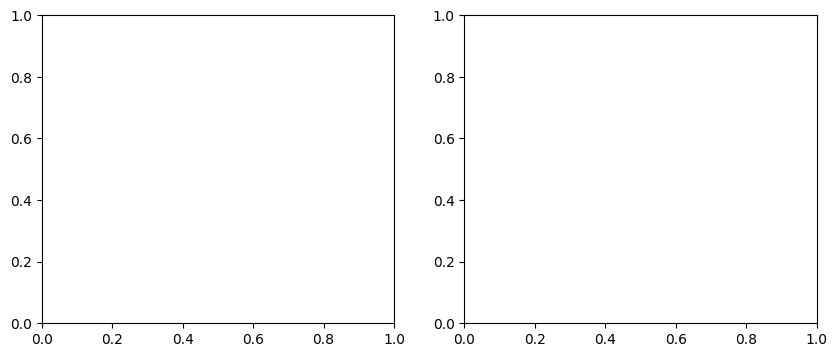

In [ ]:
cm_nn = confusion_matrix(y_test, y_pred_nn)
cm_rf = confusion_matrix(y_test, y_pred_rf)

fig, axes = plt.subplots(1, 2, figsize=(10,4))

# 8. Matriz de Confusão (comparação visual)

In [ ]:
sns.heatmap(cm_nn, annot=True, cmap="Greens", fmt='d', ax=axes[0])
axes[0].set_title("Rede Neural (Keras)")
axes[0].set_xlabel("Predito")
axes[0].set_ylabel("Real")

<Figure size 640x480 with 0 Axes>

In [ ]:
sns.heatmap(cm_rf, annot=True, cmap="Blues", fmt='d', ax=axes[1])
axes[1].set_title("Random Forest")
axes[1].set_xlabel("Predito")
axes[1].set_ylabel("Real")

Text(518.4494949494949, 0.5, 'Real')

In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# 9. Discussão dos resultados

In [ ]:
print("Resumo de desempenho:\n")
print(f"Acurácia Rede Neural (Keras): {acc:.4f}")
print(f"Acurácia Random Forest:       {acc_rf:.4f}")

Resumo de desempenho:

Acurácia Rede Neural (Keras): 0.9444
Acurácia Random Forest:       1.0000


In [ ]:
if acc > acc_rf:
    print("\n✅ A Rede Neural apresentou melhor desempenho neste conjunto de dados.")
elif acc < acc_rf:
    print("\n🌲 O modelo Random Forest teve desempenho superior neste caso.")
else:
    print("\n⚖️ Ambos os modelos obtiveram desempenho semelhante.")


🌲 O modelo Random Forest teve desempenho superior neste caso.


In [ ]:
print("""
Discussão:
- A rede neural, com 2 camadas de 32 neurônios e função ReLU, é capaz de capturar relações complexas entre as variáveis do vinho.
- O Random Forest, por outro lado, tende a generalizar bem sem necessidade de ajustes finos e costuma ser competitivo em bases pequenas.
- O desempenho pode variar de acordo com o número de épocas, neurônios e normalização aplicada.
""")


Discussão:
- A rede neural, com 2 camadas de 32 neurônios e função ReLU, é capaz de capturar relações complexas entre as variáveis do vinho.
- O Random Forest, por outro lado, tende a generalizar bem sem necessidade de ajustes finos e costuma ser competitivo em bases pequenas.
- O desempenho pode variar de acordo com o número de épocas, neurônios e normalização aplicada.



# Exercicio 2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 2. Carregamento do dataset

In [ ]:
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = california.target

print("Visualizando as primeiras linhas do dataset:")
display(X.head())

print("\nDescrição das variáveis:")
for i, col in enumerate(california.feature_names):
    print(f"{i+1}. {col}")

print(f"\nTotal de amostras: {X.shape[0]}")

Visualizando as primeiras linhas do dataset:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25



Descrição das variáveis:
1. MedInc
2. HouseAge
3. AveRooms
4. AveBedrms
5. Population
6. AveOccup
7. Latitude
8. Longitude

Total de amostras: 20640


# 3. Preparação dos dados

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Normalização concluída!")

Normalização concluída!


# 4. Criação da Rede Neural (Keras)

In [ ]:
model = Sequential([
    Dense(64, input_dim=X.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_pred_nn = model.predict(X_test_scaled).flatten()

rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
mae_nn = mean_absolute_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"RMSE (Rede Neural): {rmse_nn:.4f}")
print(f"MAE  (Rede Neural): {mae_nn:.4f}")
print(f"R²   (Rede Neural): {r2_nn:.4f}")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RMSE (Rede Neural): 2.4797
MAE  (Rede Neural): 2.1759
R²   (Rede Neural): -3.6924


In [ ]:
# Gráfico de perda
plt.figure(figsize=(10,4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

# 5. Treinamento do modelo

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=1
)


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.3648 - mae: 1.0487 - val_loss: 0.4951 - val_mae: 0.4951
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4299 - mae: 0.4682 - val_loss: 0.4249 - val_mae: 0.4561
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3957 - mae: 0.4406 - val_loss: 0.3799 - val_mae: 0.4387
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3539 - mae: 0.4239 - val_loss: 0.3860 - val_mae: 0.4391
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3384 - mae: 0.4093 - val_loss: 0.3566 - val_mae: 0.4175
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3210 - mae: 0.3970 - val_loss: 0.3464 - val_mae: 0.4036
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3067 - mae: 0.3888 - val_loss: 0.3481 - val_mae: 0.4154
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3139 - mae: 0.3920 - val_loss: 0.3390 - val_mae: 0.3957
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/

# 6. Avaliação da Rede Neural

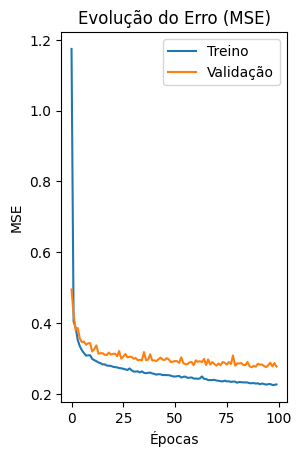

In [ ]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução do Erro (MSE)')
plt.xlabel('Épocas')
plt.ylabel('MSE')
plt.legend()

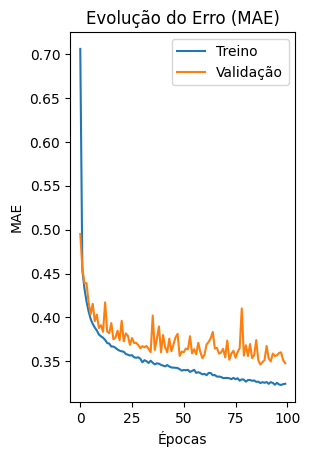

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['mae'], label='Treino')
plt.plot(history.history['val_mae'], label='Validação')
plt.title('Evolução do Erro (MAE)')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# 7. Comparação com modelo clássico (RandomForest)

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE (RandomForest): {rmse_rf:.4f}")
print(f"MAE  (RandomForest): {mae_rf:.4f}")
print(f"R²   (RandomForest): {r2_rf:.4f}")

RMSE (RandomForest): 0.5051
MAE  (RandomForest): 0.3274
R²   (RandomForest): 0.8053


# 8. Comparação das métricas entre os modelo

In [ ]:
resultados = pd.DataFrame({
    'Modelo': ['Rede Neural (Keras)', 'Random Forest'],
    'RMSE': [rmse_nn, rmse_rf],
    'MAE': [mae_nn, mae_rf],
    'R²': [r2_nn, r2_rf]
})

display(resultados)

,Modelo,RMSE,MAE,R²
0,Rede Neural (Keras),2.479720,2.175934,-3.692436
1,Random Forest,0.505143,0.327425,0.805275


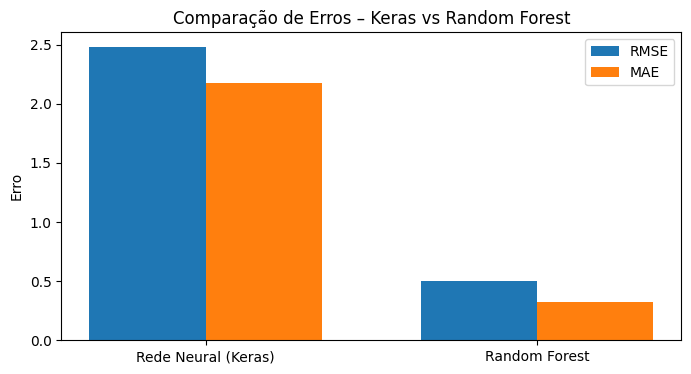

In [ ]:
plt.figure(figsize=(8,4))
bar_width = 0.35
x = np.arange(len(resultados))

plt.bar(x - bar_width/2, resultados['RMSE'], width=bar_width, label='RMSE')
plt.bar(x + bar_width/2, resultados['MAE'], width=bar_width, label='MAE')

plt.xticks(x, resultados['Modelo'])
plt.ylabel('Erro')
plt.title('Comparação de Erros – Keras vs Random Forest')
plt.legend()
plt.show()

# 9. Visualização: Real vs Predito

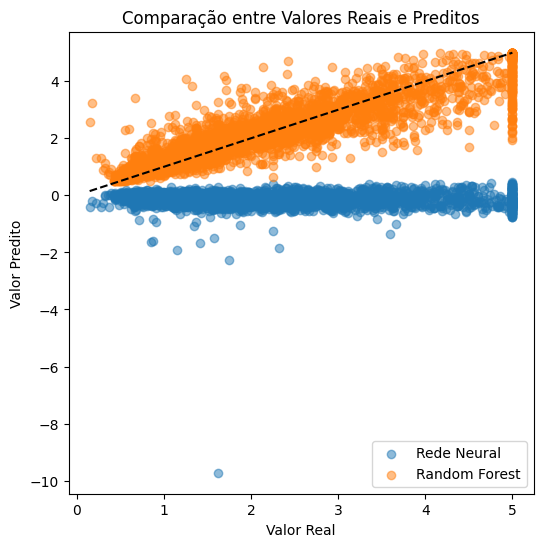

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_nn, alpha=0.5, label='Rede Neural')
plt.scatter(y_test, y_pred_rf, alpha=0.5, label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')
plt.title('Comparação entre Valores Reais e Preditos')
plt.legend()
plt.show()

# 10. Discussão dos resultados

In [ ]:
print("Resumo Final:\n")
print(resultados)


Resumo Final:

                Modelo      RMSE       MAE        R²
0  Rede Neural (Keras)  2.479720  2.175934 -3.692436
1        Random Forest  0.505143  0.327425  0.805275


In [ ]:
melhor_modelo = resultados.loc[resultados['RMSE'].idxmin(), 'Modelo']
print(f"\n✅ Melhor modelo (menor RMSE): {melhor_modelo}")


✅ Melhor modelo (menor RMSE): Random Forest


In [ ]:
print("""
Discussão:
- A Rede Neural usa 3 camadas densas (64, 32, 16) com ReLU e saída linear.
- O Random Forest é um modelo de árvore com bom desempenho em bases não lineares.
- A métrica RMSE mede o erro quadrático médio, enquanto o MAE mede o erro absoluto.
- Em geral, Random Forest costuma ter leve vantagem neste dataset, mas a Rede Neural
pode melhorar com ajuste de hiperparâmetros (épocas, batch_size, taxa de aprendizado).
""")


Discussão:
- A Rede Neural usa 3 camadas densas (64, 32, 16) com ReLU e saída linear.
- O Random Forest é um modelo de árvore com bom desempenho em bases não lineares.
- A métrica RMSE mede o erro quadrático médio, enquanto o MAE mede o erro absoluto.
- Em geral, Random Forest costuma ter leve vantagem neste dataset, mas a Rede Neural
pode melhorar com ajuste de hiperparâmetros (épocas, batch_size, taxa de aprendizado).

